In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from WindPy import w
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

In [33]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [24]:
DATA_DIR = 'D:/Data/industry/transportation/'

In [25]:
files = [f for f in os.listdir(DATA_DIR)]

In [26]:
df = pd.read_excel('%s/%s'%(DATA_DIR, files[0]))

In [27]:
for f in files[1:]:
    fname = '%s/%s'%(DATA_DIR, f)
    tdf = pd.read_excel(fname)
    df = df.merge(tdf, how='outer', left_index=True, right_index=True)

In [28]:
df = df.fillna(method='ffill').resample('BM').last()

In [80]:
df.tail()

,S0031550,S0114089,S0030518,S0000066,S0110152,M0067855,S0035984,M5469147,S0109336,S0030509,S0030512,S0030521,M0000545,S0242573,S0035972,S0030503,S0030527,S0027373,S0030515
2017-10-31,1522.0,806.81,8.0,775.54,13594.00,6.6272,10.7,6.1,117.8,0.8,5.6,13.7,6.2,0.3,13.0,8.9,5.8,2.7,1.7
2017-11-30,1578.0,705.19,8.2,785.20,13984.94,6.6107,10.6,10.3,117.8,0.8,4.5,14.3,6.1,0.4,13.3,8.7,5.5,2.3,1.6
2017-12-29,1366.0,824.18,8.2,770.64,14655.09,6.5120,10.6,10.3,117.8,0.8,4.5,14.3,6.1,0.4,13.3,8.7,5.5,2.3,1.6
2018-01-31,1152.0,858.60,2.6,819.59,15182.22,6.2920,17.3,6.0,117.8,1.4,12.3,11.5,6.2,0.5,5.5,8.7,0.2,1.8,0.3
2018-02-28,1192.0,854.19,2.6,848.32,15238.10,6.3335,17.3,6.0,117.8,1.4,12.3,11.5,6.2,0.5,5.5,8.7,0.2,1.8,0.3


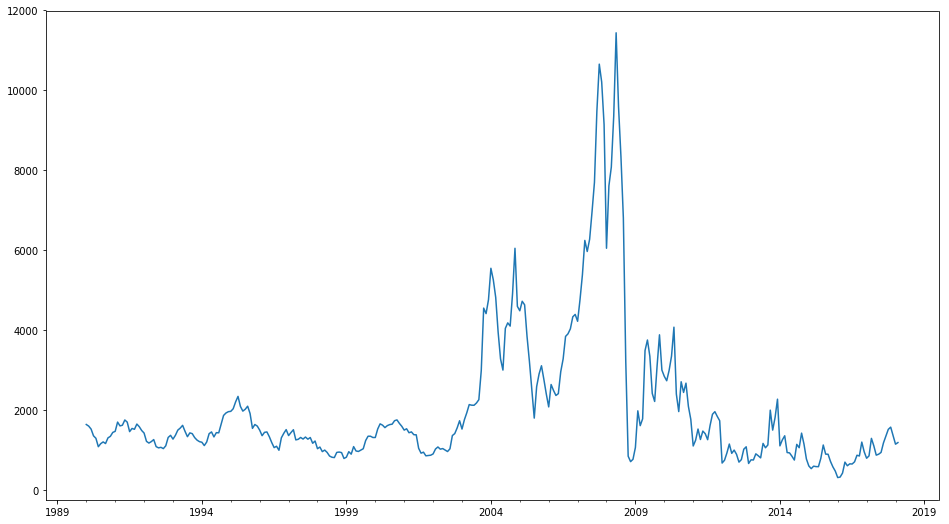

In [50]:
df['S0031550'].plot(figsize=(16, 9))

In [43]:
data = w.wsd('886027.WI, 881001.WI', 'close', '2000-01-01', '2018-02-28')

In [44]:
tdf = pd.DataFrame(np.array(data.Data).T, index=pd.to_datetime(data.Times), columns=data.Codes)

In [45]:
rdf = tdf.resample('BM').last().pct_change()

# 相对大盘超额收益

In [47]:
rdf['excess'] = rdf['886027.WI'] - rdf['881001.WI']

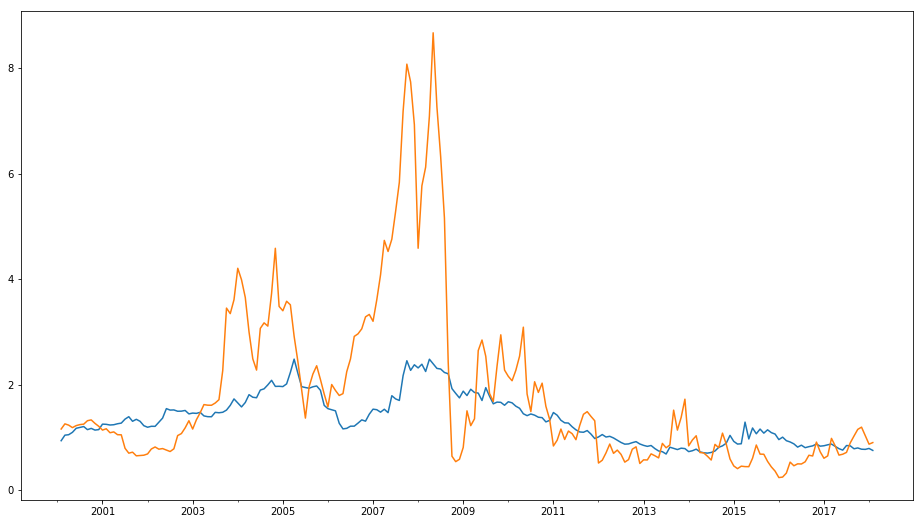

In [65]:
(1 + rdf['excess']).cumprod().plot(figsize=(16, 9))
(1 + df[df.index >= '2000-01-01']['S0031550'].pct_change()).cumprod().plot(figsize=(16, 9))
# (1 + df['S0000066'].pct_change()).cumprod().plot(figsize=(16, 9))
# (1 + df['S0114089'].pct_change()).cumprod().plot(figsize=(16, 9))

In [150]:
X = df[df.index >= '2010-02-01'].dropna(axis=1)
y = rdf[rdf.index >= '2010-02-01']['excess']

In [151]:
X.shape, y.shape

((97, 18), (97L,))

In [152]:
lasso = linear_model.Lasso(alpha=0.1)

In [153]:
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [154]:
lasso.coef_

array([ -9.61396577e-06,  -1.49984220e-05,   0.00000000e+00,
         3.24261152e-05,   1.41925118e-06,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00])

In [114]:
X.columns[lasso.coef_ != 0]

Index([u'S0031550', u'S0114089', u'S0000066', u'S0110152'], dtype='object')

In [115]:
lX = X[X.columns[lasso.coef_ != 0]]

In [116]:
lr = linear_model.LinearRegression()

In [117]:
lr.fit(lX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
lr.coef_

array([ -7.91701268e-06,  -3.84613974e-05,   6.68763796e-05,
         1.79122232e-06])